## SCIE1000/1100 Practical 11 - Semester 2, 2025 #

This practical focusses on the following material: 
- Science and modelling content from Lecture 11.


- Python from throughout the course.


- Communication building further on the principles that have been introduced.

Please review any course material you may have missed prior to the Practical.

**This practical contributes toward your final grade.  Practical grading is explained in the Practical exercises folder on Blackboard**

**Goals**:   In this practical we will be looking at differential equations (DEs). This will include understanding how to construct and analyse a DE and how to solve it using Euler's method.

The aim of the computing component of this practical is to consolidate your understanding of Python as applied to scientific contexts.
Support for these Python concepts is available: see Appendix A of the course notes, ask on the course discussion board, make use of lecturer office hours, or attend the Python Class.

In the communication component of this practical, we will continue to use the four principles for effective communication.


## Part 1: Course and teaching feedback (15 minutes) ##

#### Task 1.1: Reflecting on the course ####

Please take some time to complete the course and teaching surveys. See the relevant Blackboard announcement.
We greatly value your feedback and use it to continually improve the course and our teaching.

## Part 2: Examples of DEs (40 minutes) ##

#### Task 2.1: Modelling constrained growth ####

(This question is adapted from a question on the final examination in 2010.)

The [_von Bertalanffy growth model_](https://en.wikipedia.org/wiki/Ludwig_von_Bertalanffy#Individual_growth_model) states that the rate of increase in the length $L(t)$ of a shark of age $t$ in years is proportional to the difference between a fixed maximum length $M$ and its current length $L(t)$.  In lectures we saw that the appropriate differential equation (DE) for the length of a shark at any time is $L' = r(M-L)$ where $r$ represents the proportional constant (assume that $r$ is positive).


   1. Explain carefully what this DE predicts would happen if a mutant shark were born with a length larger than $M$.

> The shark's length would decrease logarithmically until it reaches M

   2. This DE can be solved to give a solution $L(t) = M-(M-L_0)e^{-rt}$ where $L_0$ is the length of the shark at time $t=0$ when it is born.  A certain shark is born with length equal to $M/2$. At what 
time does the model predict that the shark will have length equal to $M$? Justify your answer.

> 

   3. For a particular shark, $M=3$ m, $L_0=0.5$ m, $t$ is measured in years and $r=0.15$ per year.
   
      (a) Find the time at which the shark reaches 2 m in length.  
      (b) Draw a rough sketch of the length of the shark, for values of $t$ between 0 and 30 years. 


   4. The DE in Part 3 has an exact solution of $L(t) = 3-2.5e^{-0.15t}.$ In the following Python cell, write a Python program that plots a graph of the exact solution from the time the shark is born until $t=25$ years.
     



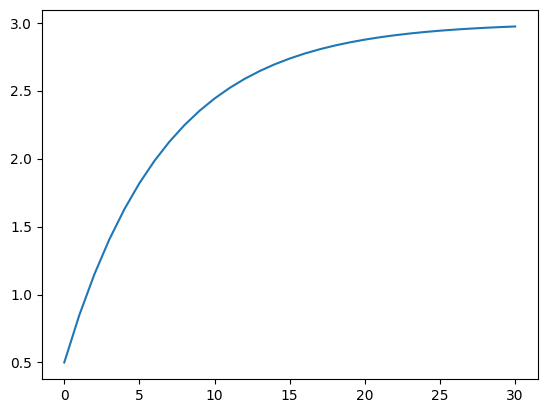

In [12]:
# Write your program here

import numpy as np
import matplotlib.pyplot as plt
from math import log as ln, log, e

# print(f"{ln(2.5)/0.15=}")

times = np.array(range(0,31))
lengths = 3 - (3 - 0.5) * e ** (-0.15 * times)
plt.plot(times, lengths)

#### Task 2.2: Algae growth - exponential ####

A biologist models the growth of a certain species of algae over a given time period. Let $P(t)$ be the population of algae per mL of water at any time $t$ in hours.

   1. The biologist believes that the population satisfies the differential equation $P'=kP$, where $k$ is a constant.
Explain briefly what this equation means. What is the physical meaning of the constant $k$? What are the units of $k$?


   2. Recall from lectures that $P(t)=Ae^{kt}$ is a solution to the DE in Part 1, where $A$ is a constant representing the initial population of algae per mL of water. The biologist's experiments show that at time $t=2$ hours, $P(2)=200$ per mL of water, and at time $t=6$ hours, $P(6)=400$ per mL. Find an equation for the population $P(t)$. (Round the value of the constant $A$ to zero decimal places, and the value of $k$ to three decimal places.)


   3. The biologist asks you whether their model for $P(t)$ in Part 2 is likely to be realistic over an extended time period. Respond to this question, with reasons justifying your answer. (You should include a rough sketch of the algae population over time as predicted by the model. If you believe their model is inaccurate, include a rough sketch of what you believe is a more accurate prediction of the population over time.)


In [15]:
from math import e, log as ln

print(f"{0.25 * ln(2)}")
print(f"{200 / (e ** (0.5 * ln(2)))=}")

0.17328679513998632
200 / (e ** (0.5 * ln(2)))=141.4213562373095


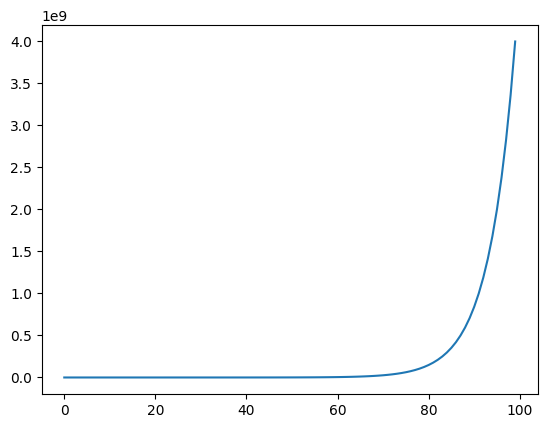

In [16]:
import matplotlib.pyplot as plt
import numpy as np

k = 0.25 * ln(2)
A = 200 / (e ** (0.5 * ln(2)))
M = 100000

times = np.array(range(0, 100))
pop = A * e ** (k * times)

plt.plot(times, pop)

## Part 3: Applying Euler's method (55 minutes) ##

#### Task 3.1: Algae growth - logistic ####

A biologist models the growth of a certain species of algae over a given time period. Let $P(t)$ be the population of algae per mL of water at any time $t$ in hours.

   1. A DE for modelling the
population of algae is the logistic DE, 
$$$$
$$P'=k(1-\displaystyle\frac{P}{T})P.$$
$$$$
Explain briefly
what this equation means. What is the physical meaning of the term
$\left(1-\displaystyle\frac{P}{T}\right)$?


   2. What does the logistic differential equation predict will
happen to the population of algae over time if the initial population is
$2T$? Justify your answer briefly.


   3. For a particular algae species, $T=500$ per mL and $k=0.1$ per
hour. At time $t=0$ hours the population is 100 per mL.
Apply **two** iterations of Euler's method with a step size of $0.5$ hours
to predict the population at $t=1$ hour. Show all work.

#### Task 3.2: Colonisation around deep sea hydrothermal vents ####

(This question is adapted from a question on the final examination in semester 1, 2022.)


A paper by Mullineaux et al. (2018) discusses models for meta-populations in the region around deep sea hydrothermal vents.  These create a 'patchwork' of sea floor habitats that host their own ecosystems. Quoting from  Mullineaux et al. (2018):
>Imagine a large number of habitat patches, $N$, of which $X(t)$ are occupied at time $t$. The remainder, $N - X(t)$, are empty and available for colonization by individuals dispersing from the occupied patches. Imagine that each occupied patch produces potential colonizers at the rate $c$. These propagules settle, randomly, on any patch; a fraction $(N - X)/N$ land on empty patches that they colonize. The total colonization rate is then $cX(N - X)/N$. 


The differential equation for the number of occupied patches is
$$
X' = c X \left( \frac{N - X}{N} \right) - d X.
$$


 1. Explain the effect of the term $-d X$, assuming that $d$ is positive.  Give a plausible physical interpretation of the constant $d$.


 2. Find the value of $X$ after one year using Euler's method for the following parameters: $c = 3.4$ year$^{-1}$, $d = 1.6$ year$^{-1}$, $N = 1000$, and $X(0) = 10$, using a time step of $h = 0.5$ years.


 3. The following partial program uses Euler's method to estimate some values taken by the solution to the DE, $X'=3.4(\frac{1000-X}{1000})-1.6X$, with initial condition $X(0)=10$ and a step size of $h = 0.5$ years. The code is also in a cell below.  Run the code and consider the output.  This output should match the values you obtained in part 2.  Ask a tutor or lecturer if you have any questions about this code.

            import numpy as np
            import matplotlib.pyplot as plt

            def Xdash(X):
                return (3.4 * X * (1000-X)/1000 - 1.6 * X)

            # set some constants related to Euler's method
            step_size = 0.5
            num_steps = 2
            initial_X = 10

            t_array = np.arange(0, num_steps*step_size+step_size/2, step_size)
            X =  np.zeros(int(num_steps+1))
            i = 0
            X[0] = initial_X
            print("step # \t Time \t X")
            print(" \t (years) \t ")
            print("-------------------------------------")
            print(i, "\t", round(i*step_size, 2), "\t", round(X[i], 2))

            while i<num_steps:
                X[i+1] = X[i] + step_size * Xdash(X[i])
                i = i + 1
                print(i, "\t", round(i*step_size, 2), "\t", round(X[i], 2))
            print("-------------------------------------")

            plt.plot(t_array, X, 'bo--')
            plt.title("Calculated number of occupied patches near a deep sea thermal vent")
            plt.xlabel("Time (years)")
            plt.ylabel("Number of occupied patches")
            plt.show()


 4. Modify the previous program so that it now estimates the number of occupied for five years (rather than one).  Keep the step size as before 0.5 years.


 5. Modify the previous program so that it now uses an appropriate number of steps of Euler's method and a step size of 0.1 years to estimate the number of occupied patches after 5 years. You might like to also modify the plot command to plot only a solid line.


 6. What differences did you observe between the output of the program from part 4 and part 5? What does the long-term behaviour seem to be? (Eg. is the value of $X$ approaching a number?)


 7. Modify the previous prgram so that it now starts with initial condition $X(0)$ = 800.  What does the long-term behaviour of this model seem to be?


 8. For the DE $X' = c X \left( \frac{N - X}{N} \right) - d X$, explain the long time behaviour by finding the value of the asymptote in terms of $c$ and $d$. (Hint: set $X'=0$ and solve for $X$).  Does this appear consistent with the results in part 6 and 7 for the specific values $c = 3.4$ year$^{-1}$, $d = 1.6$ year$^{-1}$?


 9. The program we have been using in this question has very few comments.  Add at least two comments that would improve the communication to someone who was going to be responsible for updating this code in the future.


Sources: 
- Lauren S. Mullineaux et al., “Exploring the Ecology of Deep-Sea Hydrothermal Vents in a Metacommunity Framework,” Frontiers in Marine Science 5 (2018).

step # 	 Time 	 X
 	 (years) 	 
-------------------------------------
0 	 0.0 	 800.0
1 	 0.1 	 726.4
2 	 0.2 	 677.75
3 	 0.3 	 643.57
4 	 0.4 	 618.59
5 	 0.5 	 599.83
6 	 0.6 	 585.47
7 	 0.7 	 574.31
8 	 0.8 	 565.54
9 	 0.9 	 558.6
10 	 1.0 	 553.05
11 	 1.1 	 548.61
12 	 1.2 	 545.03
13 	 1.3 	 542.13
14 	 1.4 	 539.79
15 	 1.5 	 537.88
16 	 1.6 	 536.33
17 	 1.7 	 535.07
18 	 1.8 	 534.04
19 	 1.9 	 533.2
20 	 2.0 	 532.51
21 	 2.1 	 531.95
22 	 2.2 	 531.49
23 	 2.3 	 531.12
24 	 2.4 	 530.81
25 	 2.5 	 530.56
26 	 2.6 	 530.35
27 	 2.7 	 530.18
28 	 2.8 	 530.04
29 	 2.9 	 529.93
30 	 3.0 	 529.84
31 	 3.1 	 529.76
32 	 3.2 	 529.7
33 	 3.3 	 529.65
34 	 3.4 	 529.6
35 	 3.5 	 529.57
36 	 3.6 	 529.54
37 	 3.7 	 529.52
38 	 3.8 	 529.5
39 	 3.9 	 529.48
40 	 4.0 	 529.47
41 	 4.1 	 529.46
42 	 4.2 	 529.45
43 	 4.3 	 529.44
44 	 4.4 	 529.44
45 	 4.5 	 529.43
46 	 4.6 	 529.43
47 	 4.7 	 529.43
48 	 4.8 	 529.42
49 	 4.9 	 529.42
50 	 5.0 	 529.42
51 	 5.1 	 529.42
52 	 5.2 	 

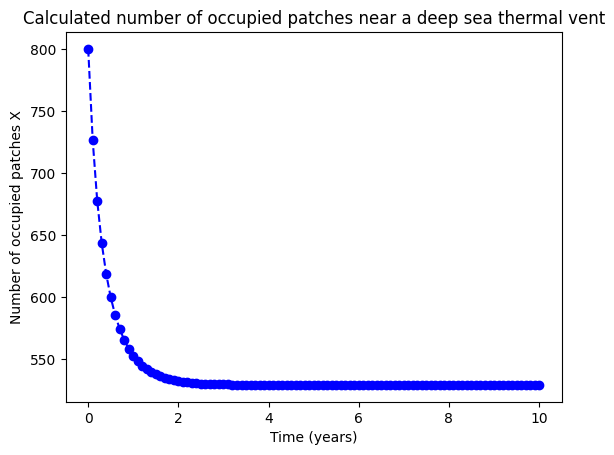

In [25]:
# Program needed for Task 3.2 parts 3, 4, 5 and 7

import numpy as np
import matplotlib.pyplot as plt

def Xdash(X):
    return (3.4 * X * (1000-X)/1000 - 1.6 * X)

# set some constants related to Euler's method
step_size = 0.1
num_steps = 100
initial_X = 800

t_array = np.arange(0, num_steps*step_size+step_size/2, step_size)
X =  np.zeros(int(num_steps+1))
i = 0
X[0] = initial_X
print("step # \t Time \t X")
print(" \t (years) \t ")
print("-------------------------------------")
print(i, "\t", round(i*step_size, 2), "\t", round(X[i], 2))

while i<num_steps:
    X[i+1] = X[i] + step_size * Xdash(X[i])
    i = i + 1
    print(i, "\t", round(i*step_size, 2), "\t", round(X[i], 2))
print("-------------------------------------")

plt.plot(t_array, X, 'bo--')
plt.title("Calculated number of occupied patches near a deep sea thermal vent")
plt.xlabel("Time (years)")
plt.ylabel("Number of occupied patches X")
plt.show()

## Part 4: Further problems ##

These problems are provided for further practice either during or after the practical.

#### Task 4.1: Functions and DEs ####

(This question was on the final examination in 2009.)

Here are the general forms of six equations used for modelling in SCIE1000.  In each case, let $y$ be the phenomenon being 
modelled, $t$ be the variable time, and $a, b$ and $c$ be positive constants.

   * (1) $\quad$ $y(t) = at + b$ 
   * (2) $\quad$ $y(t) = at^b$
   * (3) $\quad$ $y(t) = a\sin (b t)$ 
   * (4) $\quad$ $y(t) = ae^{bt}$
   * (5) $\quad$ $y(t) = at^be^{-ct}$ 
   * (6) $\quad$ An equation $y(t)$ that satisfies $y'=a\left(\displaystyle 1 - \frac{y}{b}\right)y$ 

1. _Moore's law_ says that the processing power of computers roughly doubles every 2 years. Let $y(t)$ be processing power,
where $t$ is in years from the current time.

    (a) If Moore's Law is true, which of the Equations (1) to (6) best models $y$? Briefly justify your answer.

    (b) Some experts predict that processing power will continue to increase, but at a continually decreasing rate. If so, which equation could best model $y$? Briefly justify your answer.

    (c) Sketch rough graphs of your equations from Parts (a) and (b) on a single set of axes with appropriate labels, clearly identifying each graph.


2. In _autocatalytic_ chemical reactions, one or more reaction 
products catalyse the reaction, so the rate of reaction at any time is proportional to 
both the amount of reaction product and the amount of original substance
remaining. [_Tin pest_](https://en.wikipedia.org/wiki/Tin_pest) is an autocatalytic chemical reaction in which the element 
tin transforms to a brittle form. 

   In a certain experiment, the **proportion** of a tin sample that is in brittle form is initially 1 %. Over time this proportion initially rises slowly, then rises at an increasing rate until half of the sample is in brittle form, and then this proportion rises more slowly and gradually approaches 100 %.

   Let $y(t)$ be the proportion of the tin sample that is in the brittle form at any time $t$.

    (a) Which of the Equations (1) to (6) best models $y$? Briefly justify your answer.

    (b) Chemists trial a treatment for tin that may reduce the effect of tin pest. In a treated tin sample, the reaction still follows the same general mechanism but occurs with a slower reaction rate, and a state with 60 % of the tin in brittle form is ultimately approached, rather than 100 %.

    This reaction will be modelled by the same equation as in Part A. 
    Explain whether the values of any constants would be larger than, unchanged, or smaller than those in Part A, and why.

    (c) Sketch rough graphs of your equations from Parts (a) and (b) on a single set of axes with appropriate labels, clearly identifying each graph. Mark any values that you know.
